# 
### <b>Problem Statement</b>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### <b> Business Goal</b>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [335]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [336]:
dataset=pd.read_csv('CarPrice_project.csv')

In [337]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [338]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [339]:
dataset.shape

(205, 26)

In [340]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [341]:
len(dataset[dataset.duplicated()])

0

In [342]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='Density'>

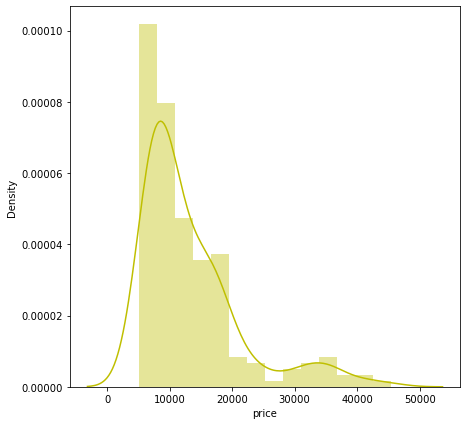

In [343]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['price'],color='y')

<AxesSubplot:xlabel='price', ylabel='Density'>

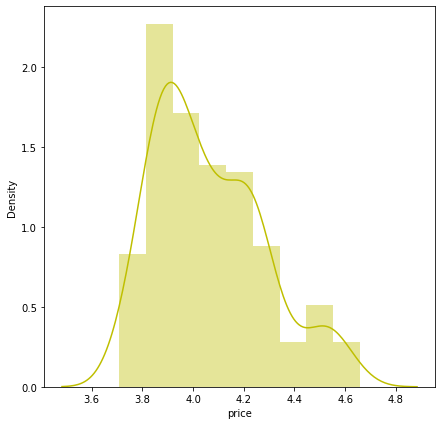

In [344]:
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['price']),color='y')
#inverse transformation(very rihtly skwed) and squareroot(less skwed)

In [345]:
num=dataset.describe().columns

In [346]:
num

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

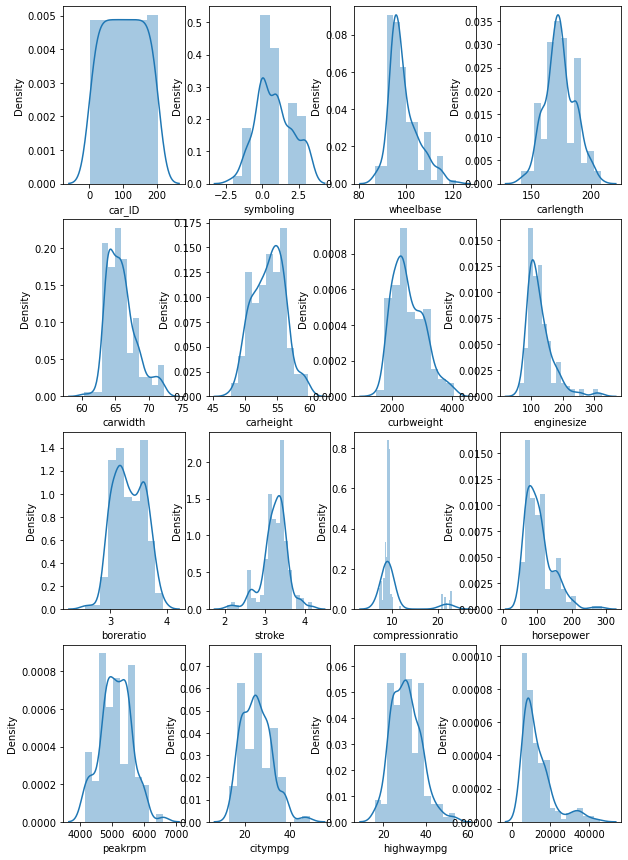

In [347]:
plt.figure(figsize=(10,15))
p=1
for i in num:
    plt.subplot(4,4,p)
    sns.distplot(dataset[i])
    p=p+1

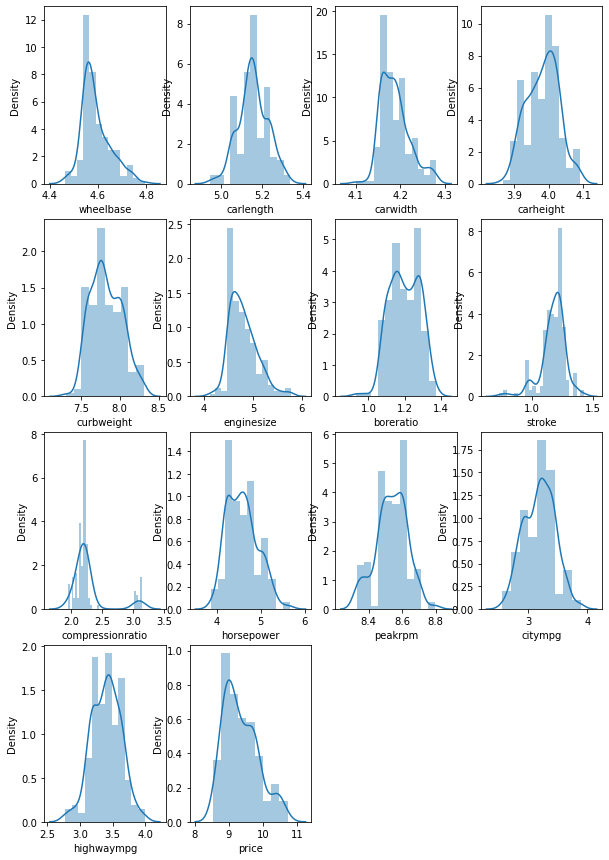

In [348]:
plt.figure(figsize=(10,15))
p=1
for i in num[2:]:
    plt.subplot(4,4,p)
    sns.distplot(np.log(dataset[i]))
    p=p+1

In [349]:
dataset['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

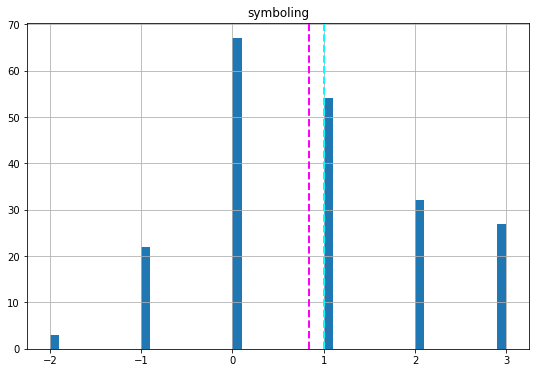

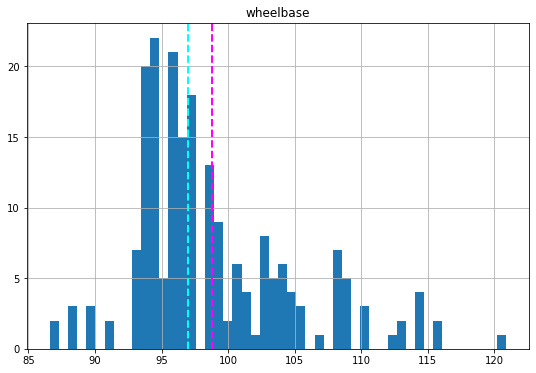

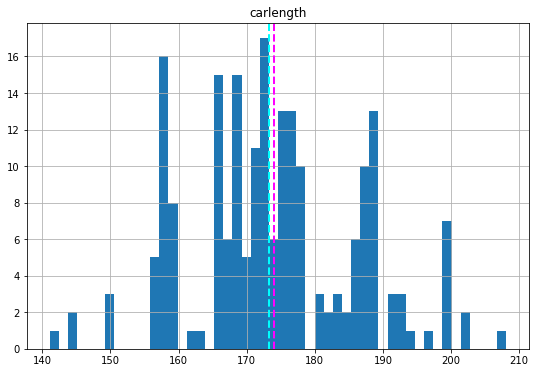

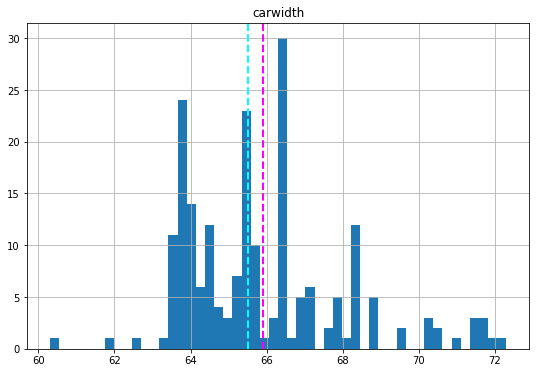

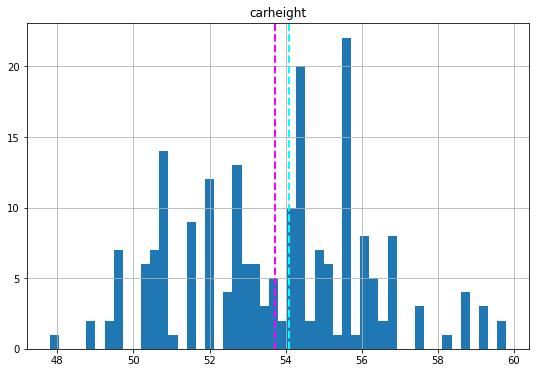

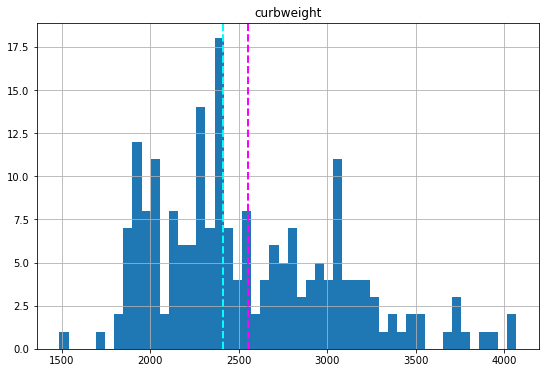

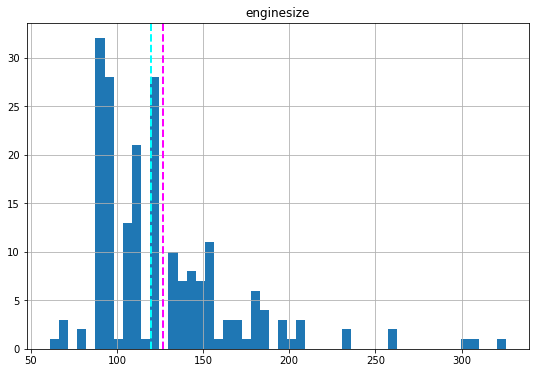

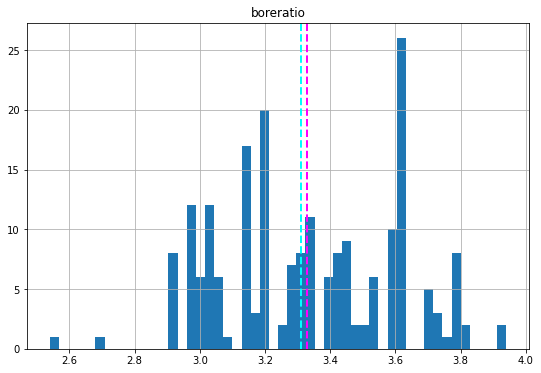

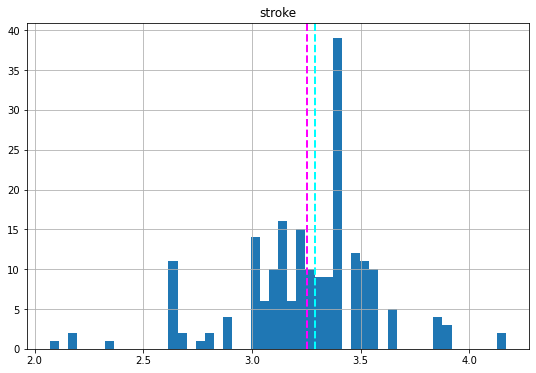

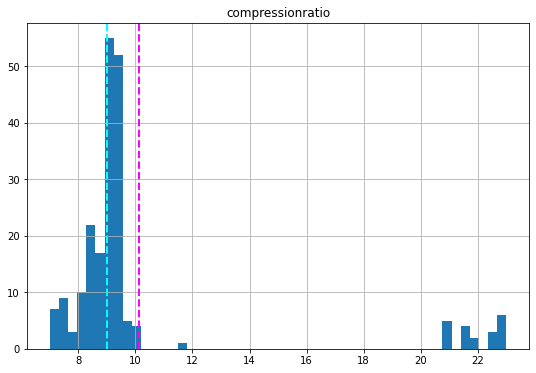

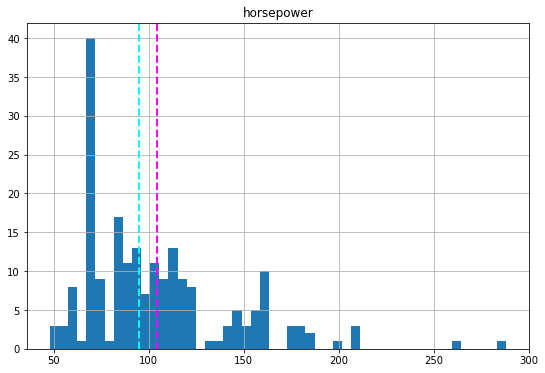

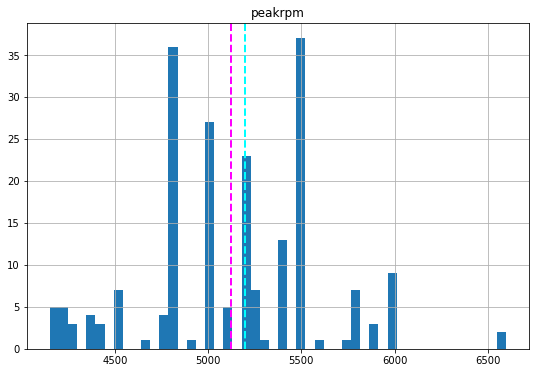

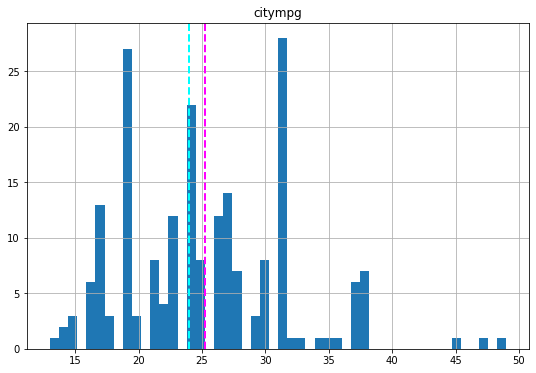

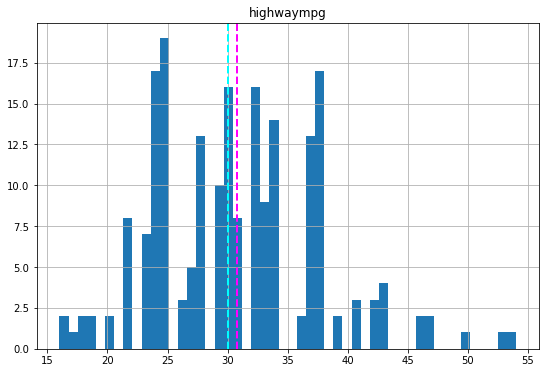

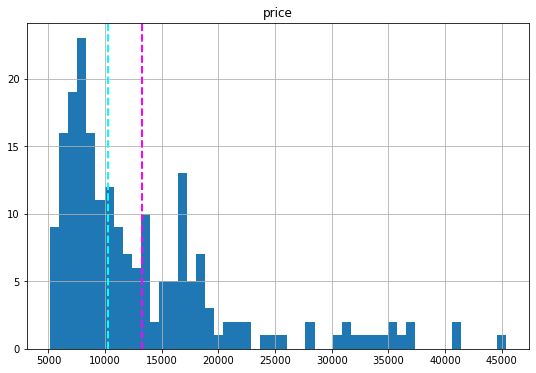

In [350]:
for i in num[1:]:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=dataset[i]
    feature.hist(bins=50,ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
    ax.set_title(i)
plt.show()

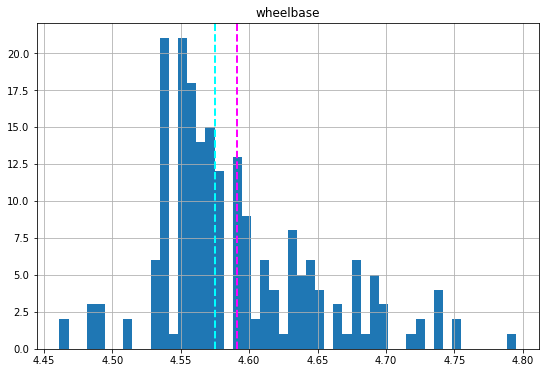

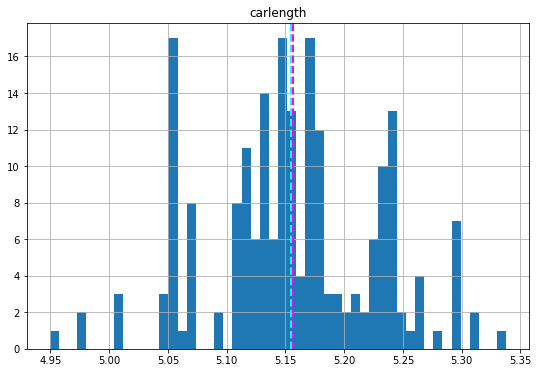

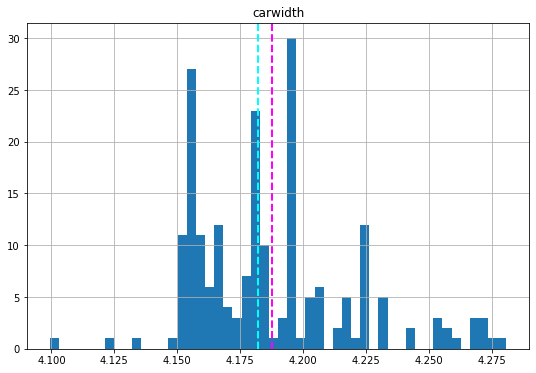

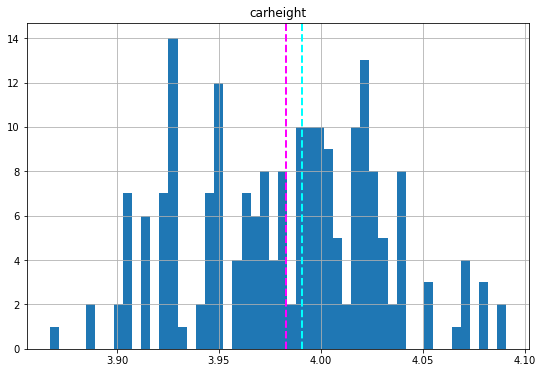

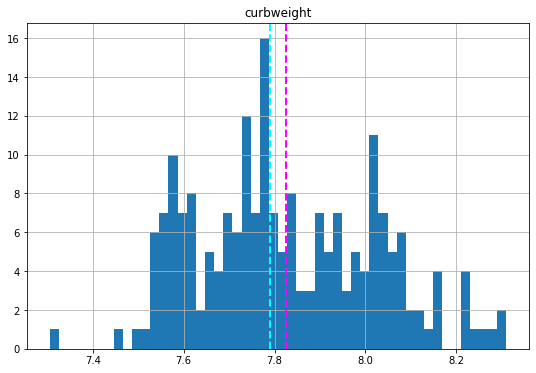

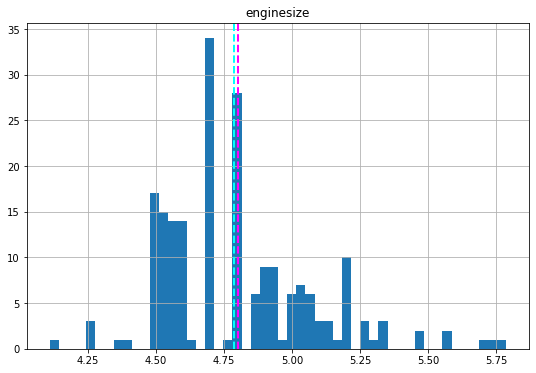

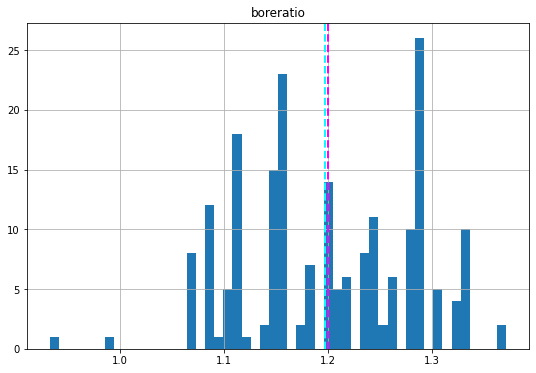

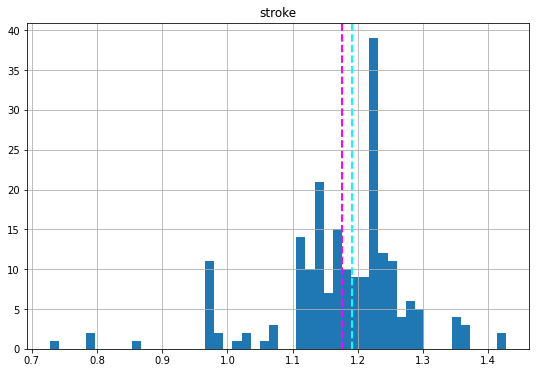

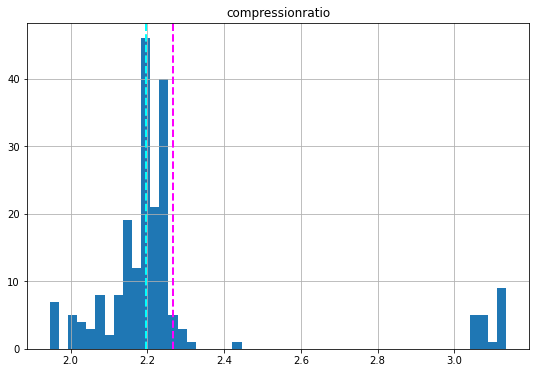

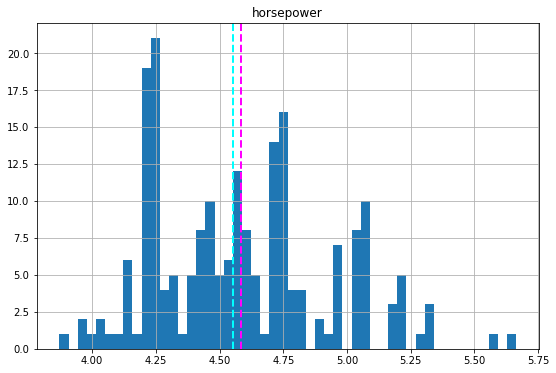

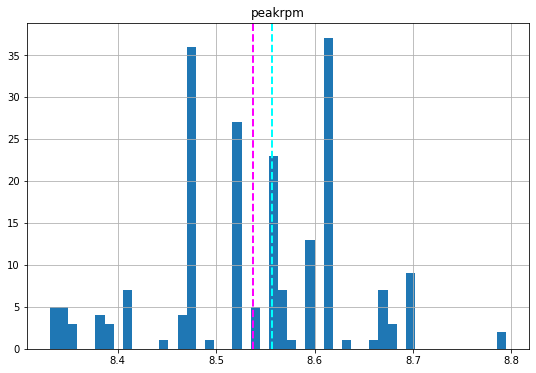

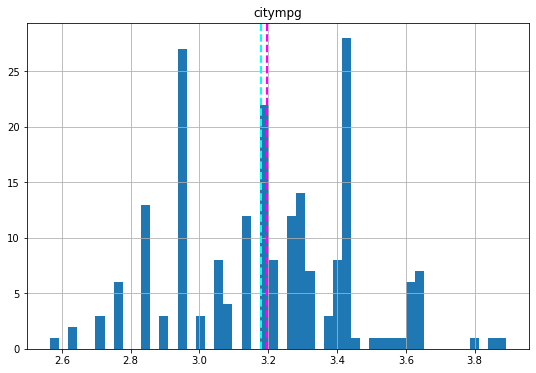

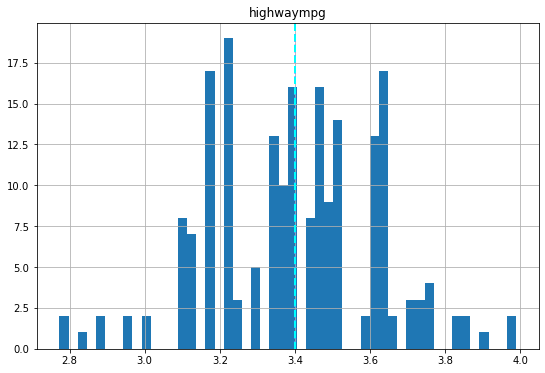

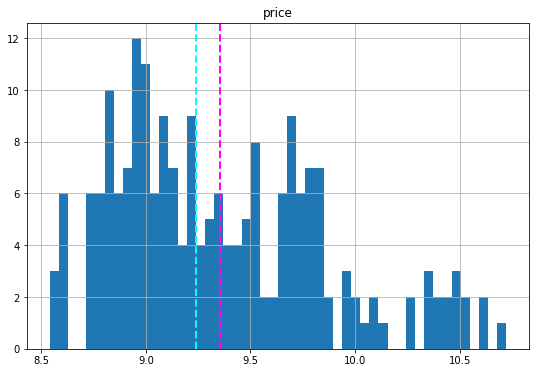

In [351]:
for i in num[2:]:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=np.log(dataset[i])
    feature.hist(bins=50,ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
    ax.set_title(i)
plt.show()

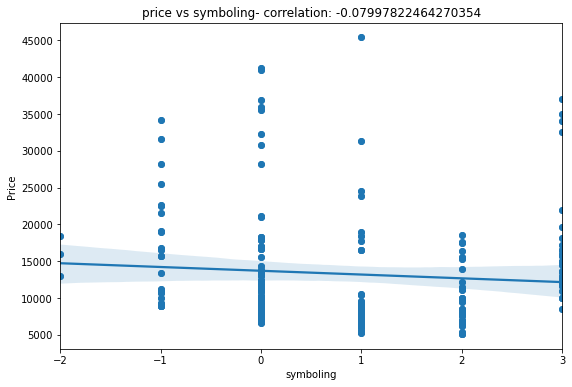

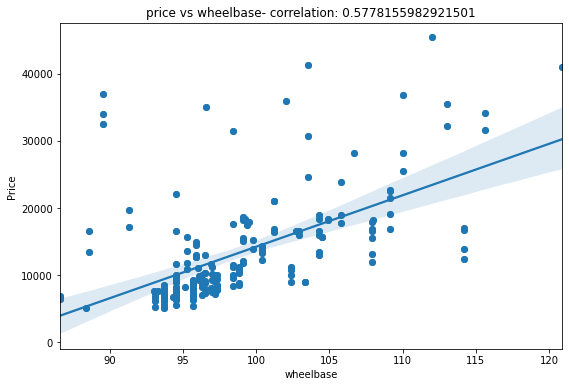

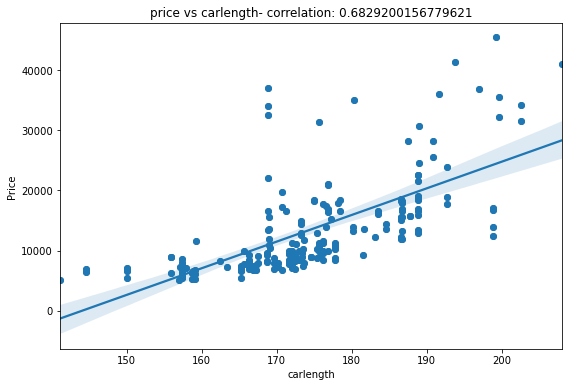

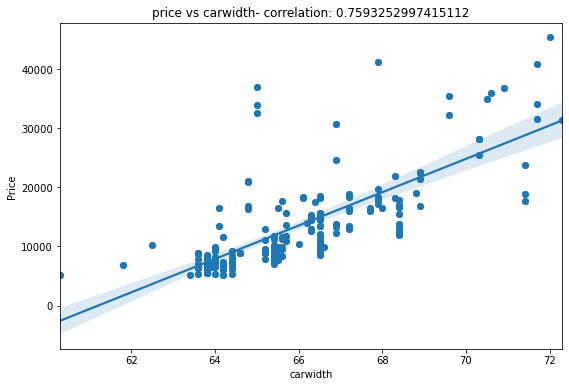

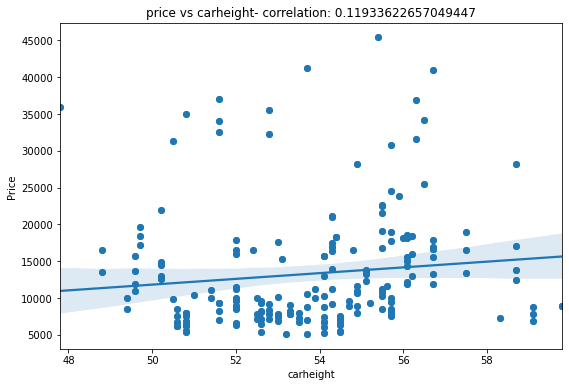

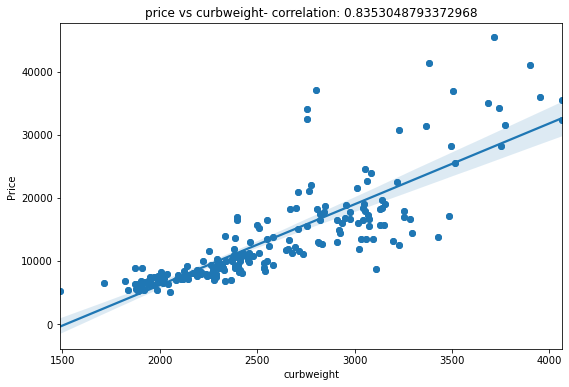

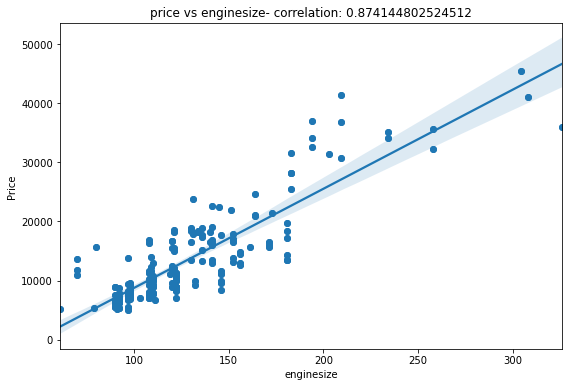

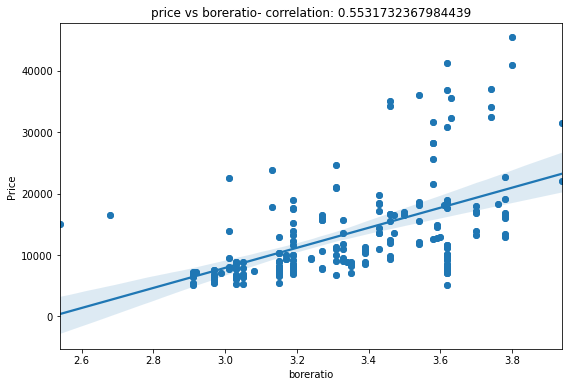

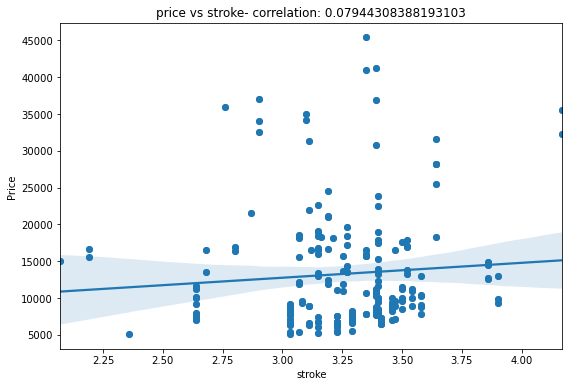

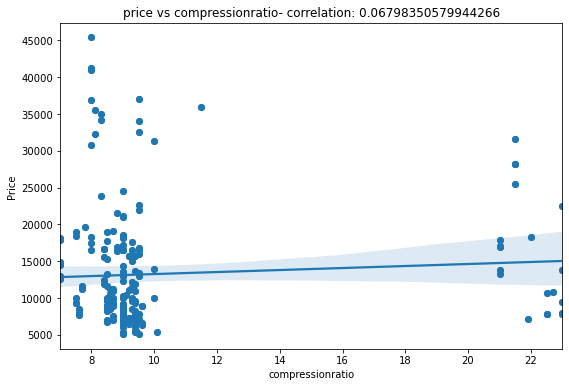

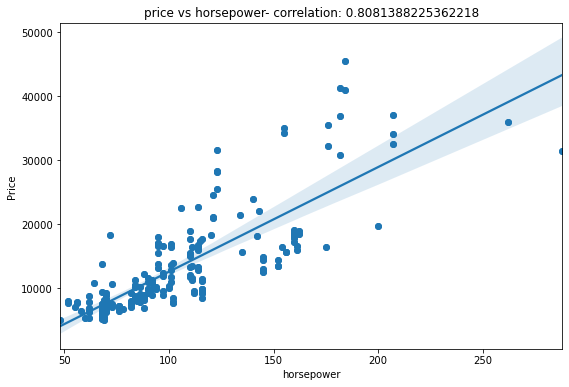

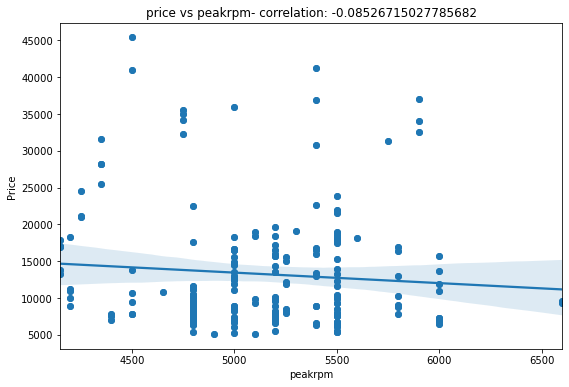

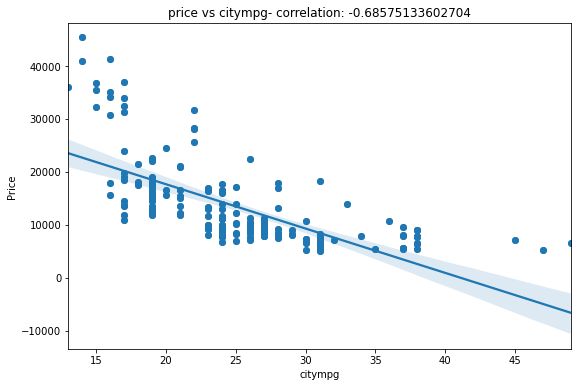

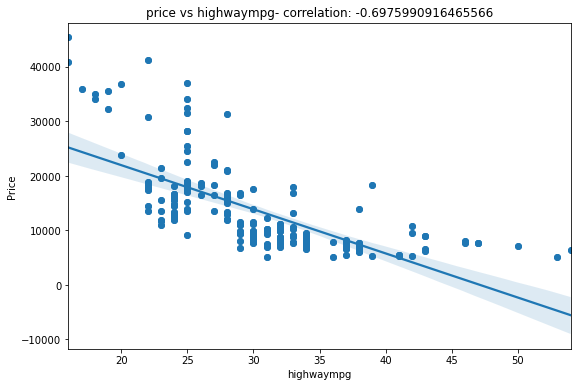

In [352]:
for i in num[1:-1]:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature = dataset[i]
    label=dataset['price']
    corr=feature.corr(label)
    sns.regplot(x=feature,y=label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title('price vs ' + i + '- correlation: ' + str(corr))
    

# Multicolinearity

<AxesSubplot:>

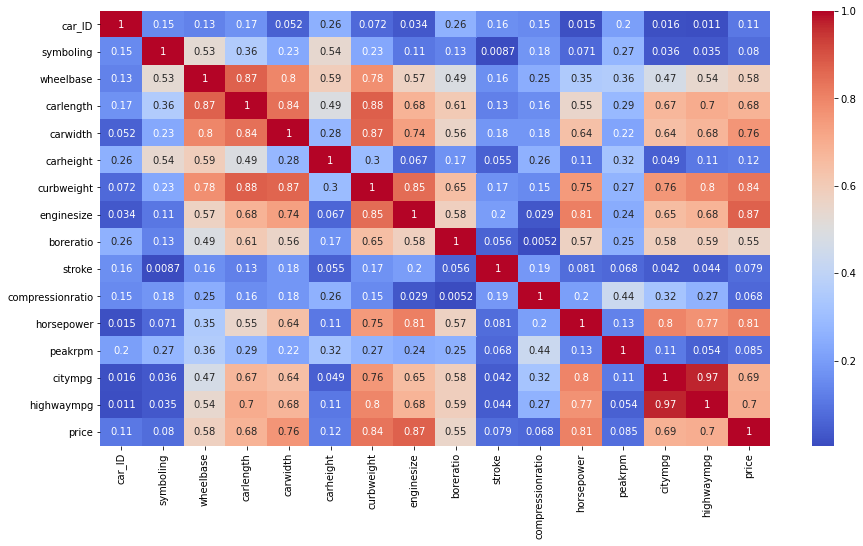

In [353]:
plt.figure(figsize=(15,8))
corr=dataset.corr()
sns.heatmap(abs(corr),annot=True,cmap='coolwarm')

In [354]:
dataset['mileage'] = 0.6*dataset['citympg'] + 0.4*dataset['highwaympg']
dataset['car_area'] = dataset['carlength']*dataset['carwidth']

In [355]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def cal_vif(x):
    vif = pd.DataFrame()
    vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["Features"] = x.columns
    return(vif)

In [356]:
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price']]])

,vif,Features
0,2.646796,symboling
1,2316.959780,wheelbase
2,6136.028870,carlength
3,3170.397591,carwidth
4,1108.503341,carheight
5,415.172460,curbweight
6,68.941339,enginesize
7,326.471548,boreratio
8,132.074737,stroke
9,16.465709,compressionratio


In [357]:
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price',"carlength","carwidth","citympg","highwaympg"]]])

,vif,Features
0,2.055617,symboling
1,1981.325782,wheelbase
2,825.908353,carheight
3,406.251907,curbweight
4,67.262383,enginesize
5,261.276569,boreratio
6,120.599905,stroke
7,15.829665,compressionratio
8,58.898896,horsepower
9,190.656419,peakrpm


<AxesSubplot:>

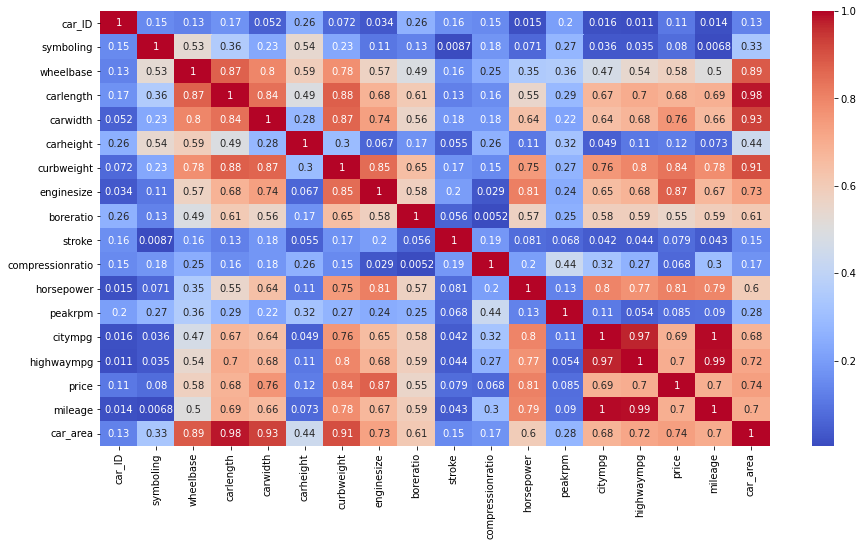

In [358]:
plt.figure(figsize=(15,8))
corr=dataset.corr()
sns.heatmap(abs(corr),annot=True,cmap='coolwarm') ##car area and wheelbase is related and wheelbase has less impact on price so ignore wheelbase

In [359]:
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price',"carlength","carwidth","citympg","highwaympg","wheelbase"]]])

,vif,Features
0,1.918068,symboling
1,685.266009,carheight
2,391.741228,curbweight
3,67.005317,enginesize
4,251.628966,boreratio
5,115.419047,stroke
6,15.594990,compressionratio
7,55.174355,horsepower
8,180.248036,peakrpm
9,84.886422,mileage


In [360]:
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])
#do this analysis to bring the values under 10 and left with this 3 variable

,vif,Features
0,5.170320,enginesize
1,9.119143,compressionratio
2,8.201171,mileage


In [361]:
num_features=['enginesize','compressionratio','mileage']

In [362]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [363]:
dataset['company']=dataset['CarName'].str.split(" ",expand=True)[0]

In [364]:
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})

In [365]:
dataset['company']=dataset['company'].str.title()

In [366]:
dataset['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Honda          13
Mitsubishi     13
Subaru         12
Volkswagen     12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Plymouth        7
Audi            7
Saab            6
Porsche         5
Isuzu           4
Alfa-Romero     3
Jaguar          3
Chevrolet       3
Renault         2
Mercury         1
Name: company, dtype: int64

In [367]:
cat_col=dataset.describe(include=['object','category']).columns

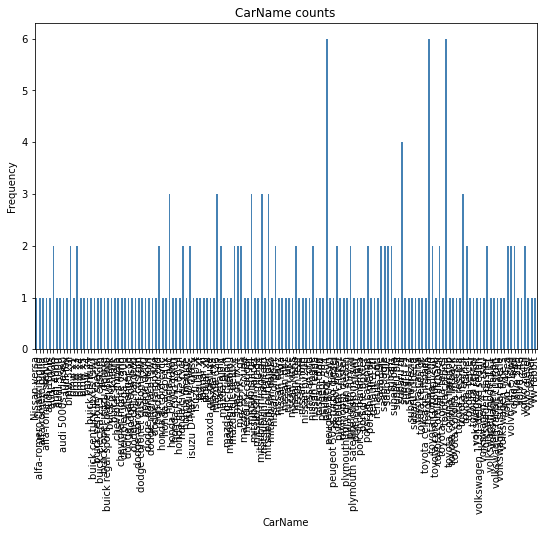

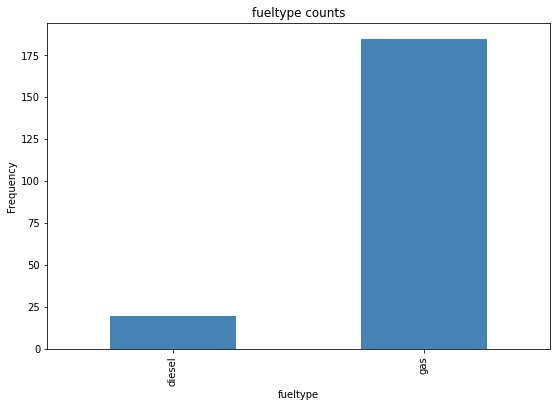

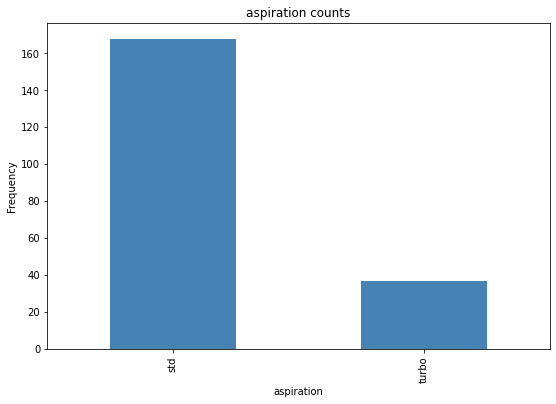

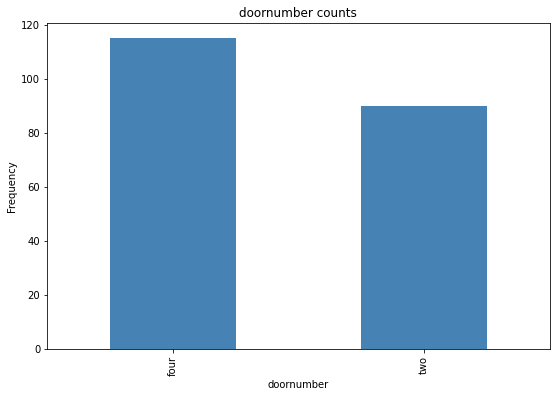

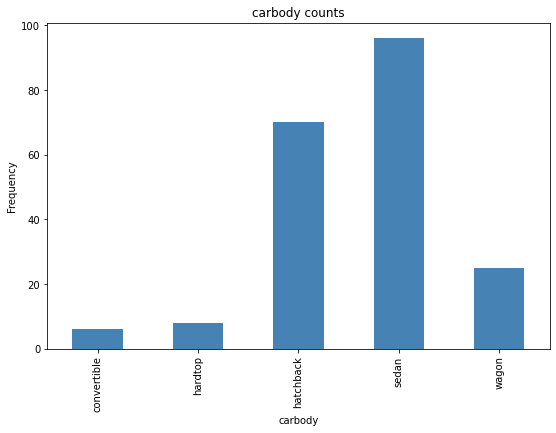

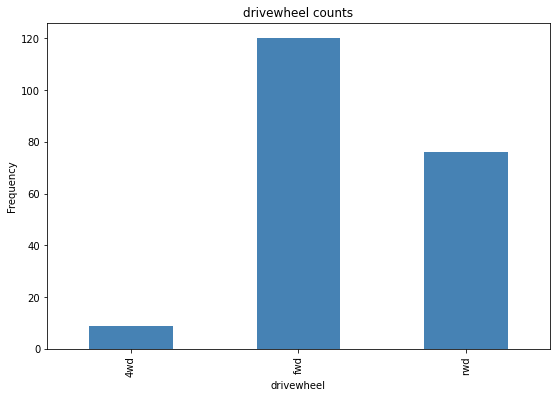

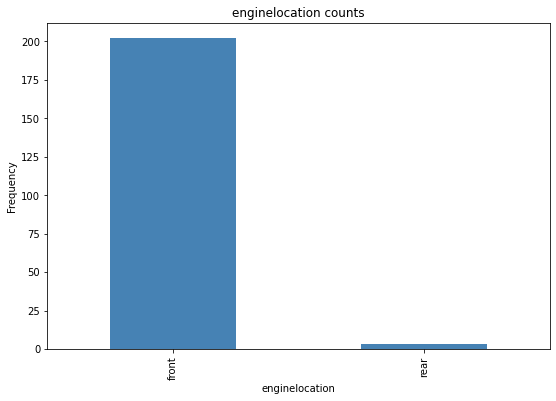

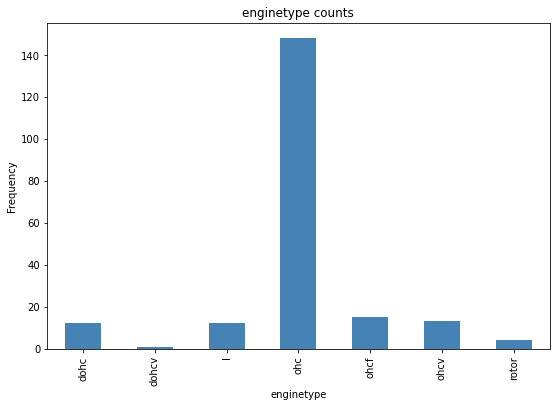

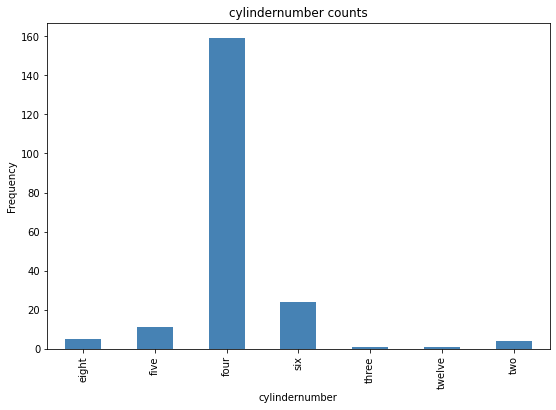

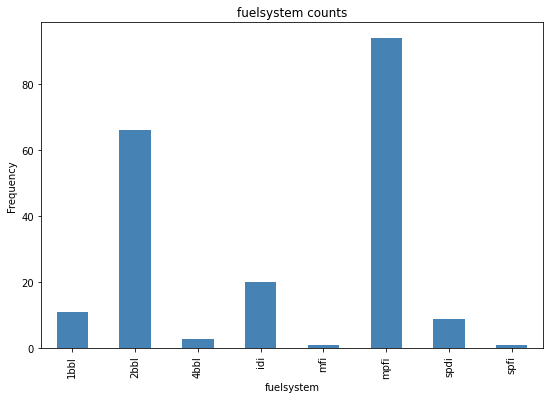

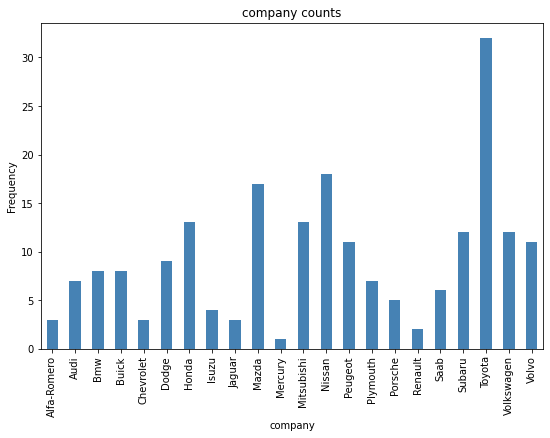

In [368]:
for col in cat_col:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

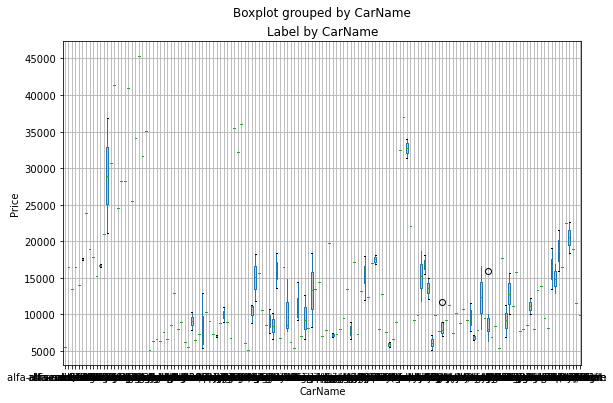

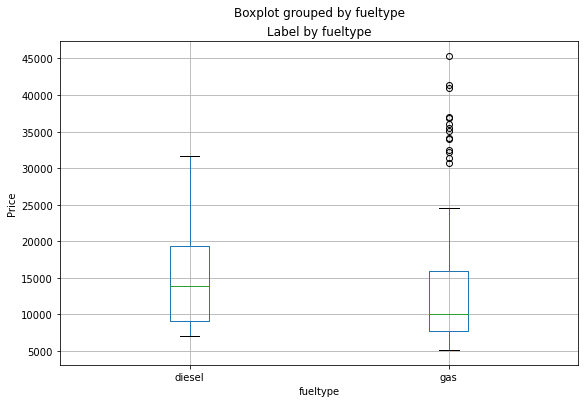

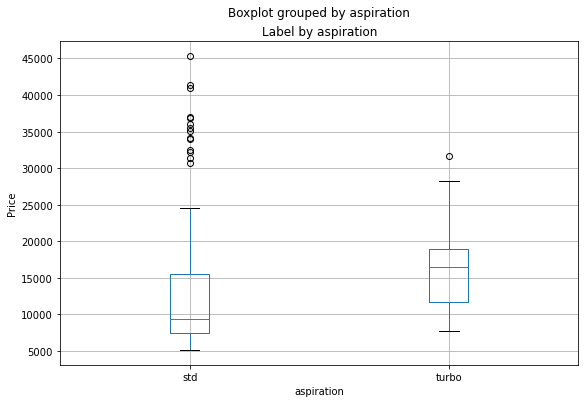

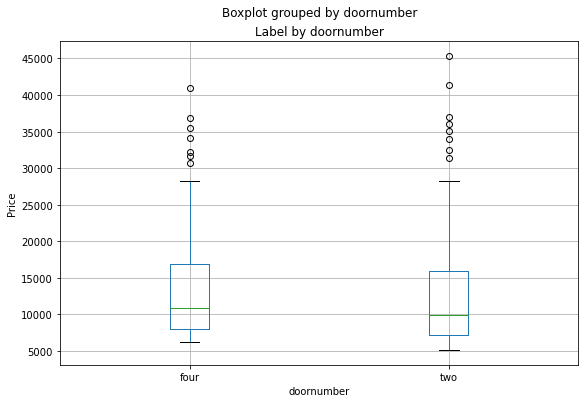

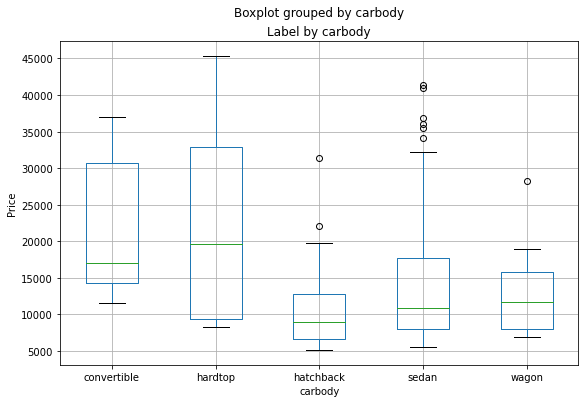

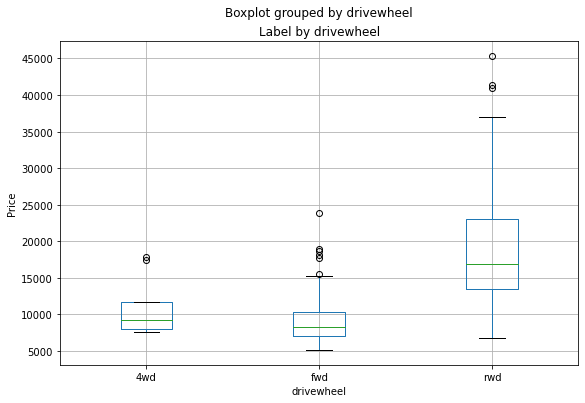

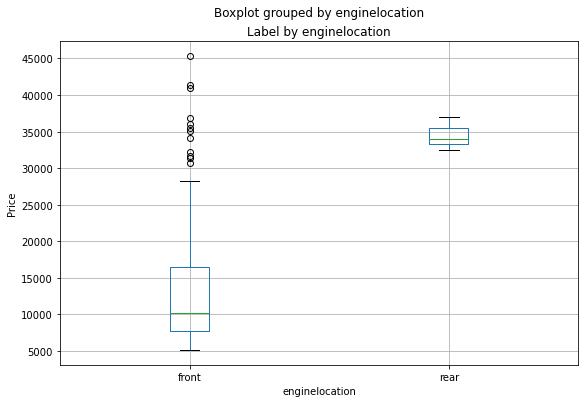

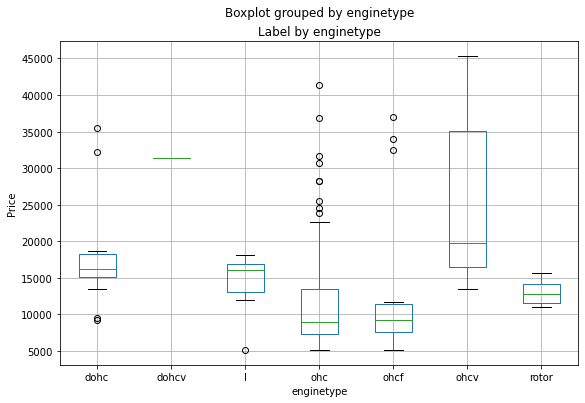

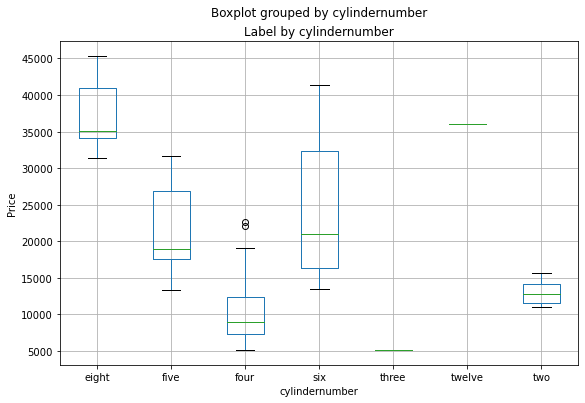

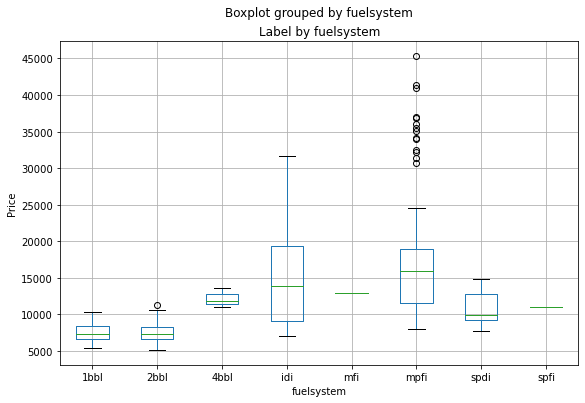

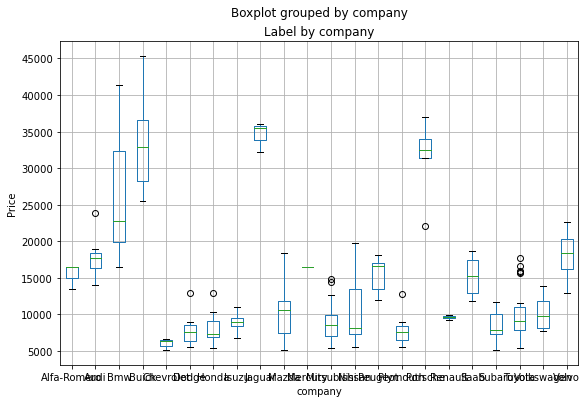

In [369]:
for col in cat_col:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    dataset.boxplot(column='price',by=col,ax=ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<AxesSubplot:xlabel='company'>

<Figure size 1440x432 with 0 Axes>

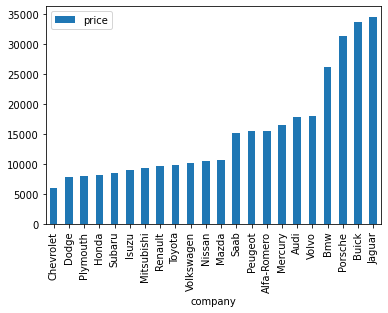

In [370]:
plt.figure(figsize=(20, 6))
df_c=pd.DataFrame(dataset.groupby(['company']).price.mean().sort_values())
df_c.plot.bar()

In [371]:
df_c.rename(columns={'price':'price_mean'},inplace=True)

In [372]:
df_c

,price_mean
company,
Chevrolet,6007.000000
Dodge,7875.444444
Plymouth,7963.428571
Honda,8184.692308
Subaru,8541.250000
Isuzu,8916.500000
Mitsubishi,9239.769231
Renault,9595.000000
Toyota,9885.812500


In [373]:
dataset = dataset.merge(df_c,on = 'company',how = 'left')

In [374]:
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [375]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950.0,26.4,11690.92,Audi,17859.166714,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450.0,19.6,11726.24,Audi,17859.166714,1


In [376]:
dataset.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,price_mean,company_cat
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.014107,0.129848,-0.147870,-0.193537
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.006828,-0.332196,-0.123315,-0.128135
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.504307,0.885248,0.544494,0.564441
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.689634,0.982352,0.609220,0.625301
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.661548,0.926475,0.680698,0.655887
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,-0.073365,0.440987,0.186132,0.238794
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.779362,0.906811,0.725252,0.712924
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.668134,0.729031,0.760656,0.689446
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,-0.589664,0.607996,0.494625,0.493889
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043182,0.151343,0.009705,-0.068332


In [377]:
dataset_pr=dataset.copy()

In [378]:
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

dataset_pr = dataset_pr.replace(encoders_nums)

In [379]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody","enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [380]:
features= num_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

In [381]:
features

['enginesize',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [424]:
x = dataset_pr[features]
y = np.log10(dataset_pr['price'])

In [425]:
x.head()

,enginesize,compressionratio,mileage,fueltype,aspiration,doornumber,drivewheel,cylindernumber,company_cat,body_convertible,...,etype_dohc,etype_l,etype_ohc,etype_ohcf,etype_ohcv,fsystem_1bbl,fsystem_2bbl,fsystem_idi,fsystem_mpfi,fsystem_spdi
0,130,9.0,23.4,0,0,2,1,4,1,1,...,1,0,0,0,0,0,0,0,1,0
1,130,9.0,23.4,0,0,2,1,4,1,1,...,1,0,0,0,0,0,0,0,1,0
2,152,9.0,21.8,0,0,2,1,6,1,0,...,0,0,0,0,1,0,0,0,1,0
3,109,10.0,26.4,0,0,4,0,4,1,0,...,0,0,1,0,0,0,0,0,1,0
4,136,8.0,19.6,0,0,4,0,5,1,0,...,0,0,1,0,0,0,0,0,1,0


In [426]:
##Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [427]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [428]:
x_test=scaler.transform(x_test)

In [429]:
x_train

array([[-0.12142934, -0.34405611,  0.33207746, ..., -0.30265996,
         1.00701763, -0.20927403],
       [ 0.3144969 , -0.53162769, -1.00936537, ..., -0.30265996,
         1.00701763, -0.20927403],
       [-0.41204683,  3.35378351,  0.70097423, ...,  3.30403793,
        -0.99303127, -0.20927403],
       ...,
       [-0.72688245, -0.15648454,  1.06987101, ..., -0.30265996,
        -0.99303127, -0.20927403],
       [ 1.06525876, -0.18328048, -1.00936537, ..., -0.30265996,
         1.00701763, -0.20927403],
       [ 1.30744   , -0.26366829, -1.34472608, ..., -0.30265996,
         1.00701763, -0.20927403]])

In [430]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [431]:
from sklearn.linear_model import LinearRegression

In [432]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [433]:
## print the coefficients and the intercept
print(regression.coef_)
print(regression.intercept_)

[ 0.06848438  0.07258745 -0.07234305 -0.03103357  0.02412534  0.02386113
  0.00740163 -0.00792131  0.07241306  0.01151167  0.01446156 -0.00050838
 -0.00489134 -0.00629247 -0.02689294 -0.04038817 -0.04661417 -0.03470902
 -0.02731979 -0.0141071  -0.03241959 -0.03103357 -0.0021166  -0.01188217]
4.060546651313083


In [434]:
reg_pred=regression.predict(x_test)

In [435]:
reg_pred

array([4.47270194, 4.23402038, 3.92098076, 4.14218632, 4.47326877,
       3.81730887, 3.88910546, 3.88693931, 3.94954266, 3.83263423,
       4.1137605 , 3.85551437, 4.1182976 , 4.01305999, 4.65798104,
       3.84444676, 3.50996874, 4.09198004, 3.9485589 , 3.94706962,
       3.94322565, 4.2067644 , 3.90609403, 3.61201773, 3.84020727,
       4.42463883, 4.1520111 , 4.20941357, 3.84701195, 4.21907103,
       4.48292623, 3.84890983, 3.88431318, 4.29659376, 3.94194891,
       4.53235084, 4.01254231, 4.14605836, 3.76888822, 4.09198004,
       3.8563905 , 4.01546285, 4.14890814, 3.83093894, 3.85666942,
       3.89222055, 3.84890983, 3.84026108, 4.17990474, 4.15124469,
       3.72952767, 4.15190143, 3.74355482, 3.98009642, 3.84701195,
       4.16474975, 4.1520111 , 4.14605836, 4.43237321, 3.74593741,
       3.92912661, 4.15350455])

In [436]:
y_test

15     4.487986
9      4.251861
100    3.979958
132    4.073718
68     4.450988
         ...   
56     4.073535
128    4.568530
76     3.731508
144    3.965343
104    4.235503
Name: price, Length: 62, dtype: float64

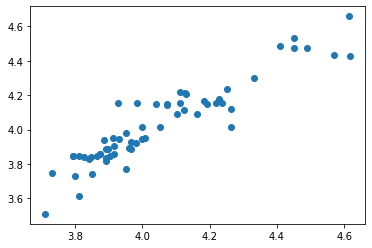

In [437]:
plt.scatter(y_test,reg_pred)

In [438]:
residuals=y_test-reg_pred

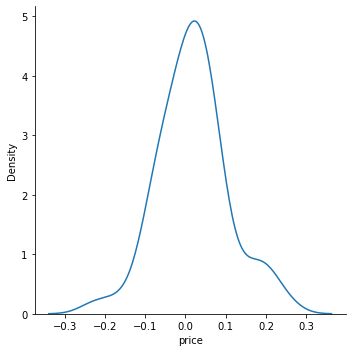

In [439]:
sns.displot(residuals,kind="kde")

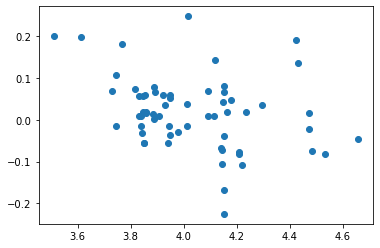

In [440]:
plt.scatter(reg_pred,residuals)

In [441]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.06646413047399011
0.007805604661481996
0.08834933311283111


In [442]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.8394546883415501


In [450]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7353171888874205

In [451]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0014 , max_iter= 3000)
lasso.fit(x_train, y_train)
lasso_pred=regression.predict(x_test)
print(mean_absolute_error(y_test,lasso_pred))
print(mean_squared_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))
score1=r2_score(y_test,lasso_pred)
print(score1)
1 - (1-score1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.06646413047399011
0.007805604661481996
0.08834933311283111
0.8394546883415501


0.7353171888874205

In [452]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=5 , max_iter= 3000)
ridge.fit(x_train, y_train)
ridge_pred=regression.predict(x_test)
print(mean_absolute_error(y_test,ridge_pred))
print(mean_squared_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))
score2=r2_score(y_test,ridge_pred)
print(score2)
1 - (1-score2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.06646413047399011
0.007805604661481996
0.08834933311283111
0.8394546883415501


0.7353171888874205

In [453]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(x_train, y_train)
elasticnet=regression.predict(x_test)
print(mean_absolute_error(y_test,elasticnet))
print(mean_squared_error(y_test,elasticnet))
print(np.sqrt(mean_squared_error(y_test,elasticnet)))
score3=r2_score(y_test,ridge_pred)
print(score3)
1 - (1-score3)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.06646413047399011
0.007805604661481996
0.08834933311283111
0.8394546883415501


0.7353171888874205

In [475]:
regression.predict(scaler.transform(dataset_pr[features].iloc[0:1]).reshape(1,-1))

array([4.23782724])

In [476]:
import pickle
pickle.dump(regression,open('regmodel_car.pkl','wb'))

In [478]:
pickled_model=pickle.load(open('regmodel_car.pkl','rb'))

In [479]:
pickled_model.predict(scaler.transform(dataset_pr[features].iloc[0:1]).reshape(1,-1))

array([4.23782724])